## Libraries

In [1]:
!pip install MFDFA

In [2]:
!pip install --force-reinstall git+https://github.com/rsautter/Chi

  Cloning https://github.com/rsautter/Chi to /tmp/pip-req-build-lnbp8udg
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/Chi /tmp/pip-req-build-lnbp8udg
  Resolved https://github.com/rsautter/Chi to commit ef3bf2c54110524df9e799a3c925ec48bca4cde9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Chi-Space: filename=chi_space-0.2-py3-none-any.whl size=11583 sha256=a34d6ee4116f4e05c088087fc028e8f6de0409c3b6941910522cf3341d2ff1e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-7kv8r9co/wheels/4c/a7/5a/cf7c5b6884c39f95dd6d5dca94bf4be547f0247b29aa0f7ddc
Successfully built Chi-Space


In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import chi
from scipy import stats

## Downloading Real Data

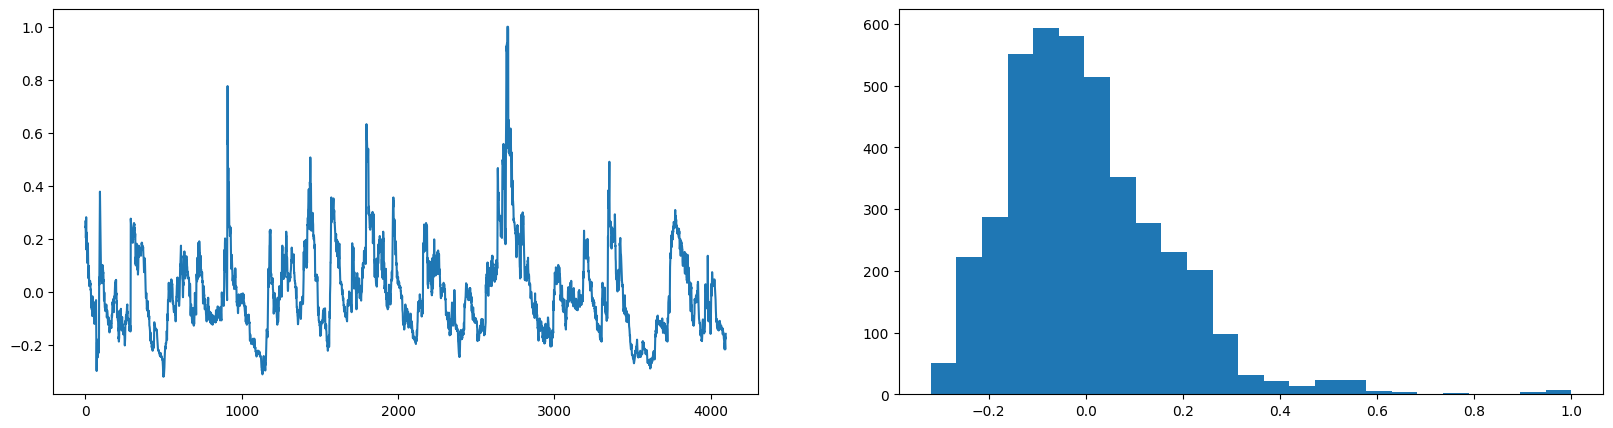

In [4]:
sw4096 = chi.get_SolarWind()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(sw4096)
plt.subplot(1,2,2)
plt.hist(sw4096,bins=25)
plt.show()

0.9332529647314404


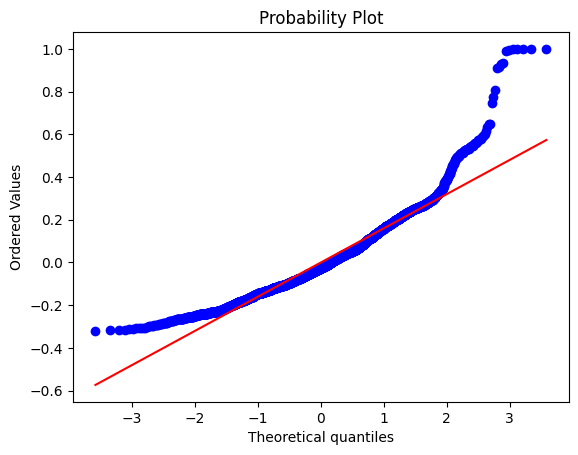

In [5]:
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(sw4096,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

In [76]:
swc = chi.chiSpace(sw4096)

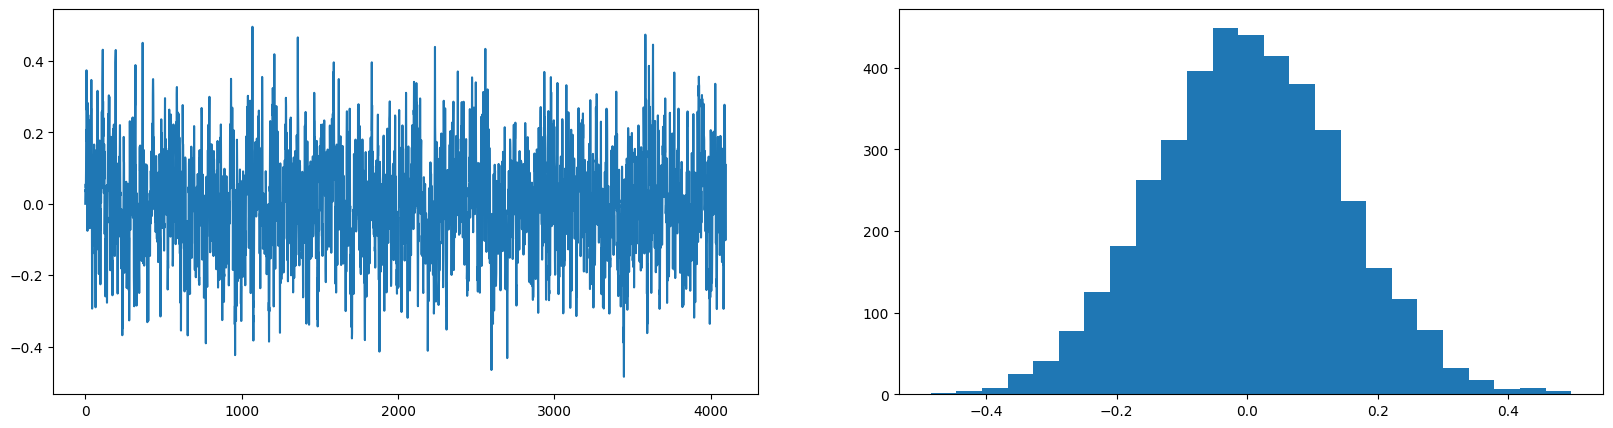

In [6]:
sw4096_s = chi.get_SurrogateSolarWind()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(sw4096_s)
plt.subplot(1,2,2)
plt.hist(sw4096_s,bins=25)
plt.show()

0.9997351271589228


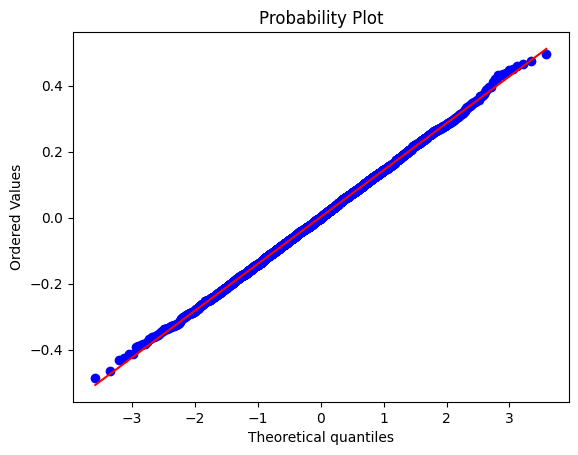

In [7]:
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(sw4096_s,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

In [26]:
sw4096_s.shape

(4096,)

In [77]:
swc_s = chi.chiSpace(sw4096_s)

In [9]:
!wget https://media.githubusercontent.com/media/rsautter/Chi/refs/heads/main/examples/seg_1b1ad8.csv

--2025-04-29 17:49:48--  https://media.githubusercontent.com/media/rsautter/Chi/refs/heads/main/examples/seg_1b1ad8.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330012 (322K) [text/plain]
Saving to: ‘seg_1b1ad8.csv’

seg_1b1ad8.csv      100%[===================>] 322.28K  --.-KB/s    in 0.04s   

2025-04-29 17:49:48 (8.34 MB/s) - ‘seg_1b1ad8.csv’ saved [330012/330012]



In [10]:
!wget https://media.githubusercontent.com/media/rsautter/Chi/refs/heads/main/examples/seg_1bd38e.csv

--2025-04-29 17:49:48--  https://media.githubusercontent.com/media/rsautter/Chi/refs/heads/main/examples/seg_1bd38e.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321539 (314K) [text/plain]
Saving to: ‘seg_1bd38e.csv’

seg_1bd38e.csv      100%[===================>] 314.00K  --.-KB/s    in 0.04s   

2025-04-29 17:49:49 (7.18 MB/s) - ‘seg_1bd38e.csv’ saved [321539/321539]



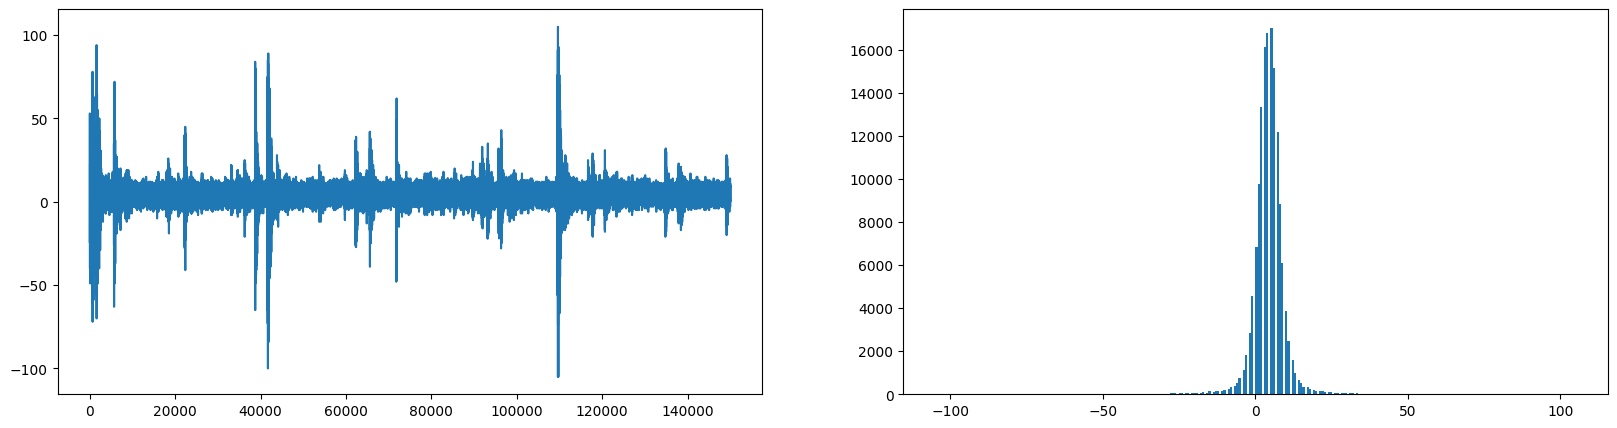

In [13]:
def get_Acoustic1():
	'''
	Source:
		https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/overview
	'''
	return pd.read_csv(r'seg_1b1ad8.csv')["acoustic_data"].values

ac1 = get_Acoustic1()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ac1)
plt.subplot(1,2,2)
plt.hist(ac1,bins=300)
plt.show()

In [14]:
lanl1 = chi.chiSpace(ac1)

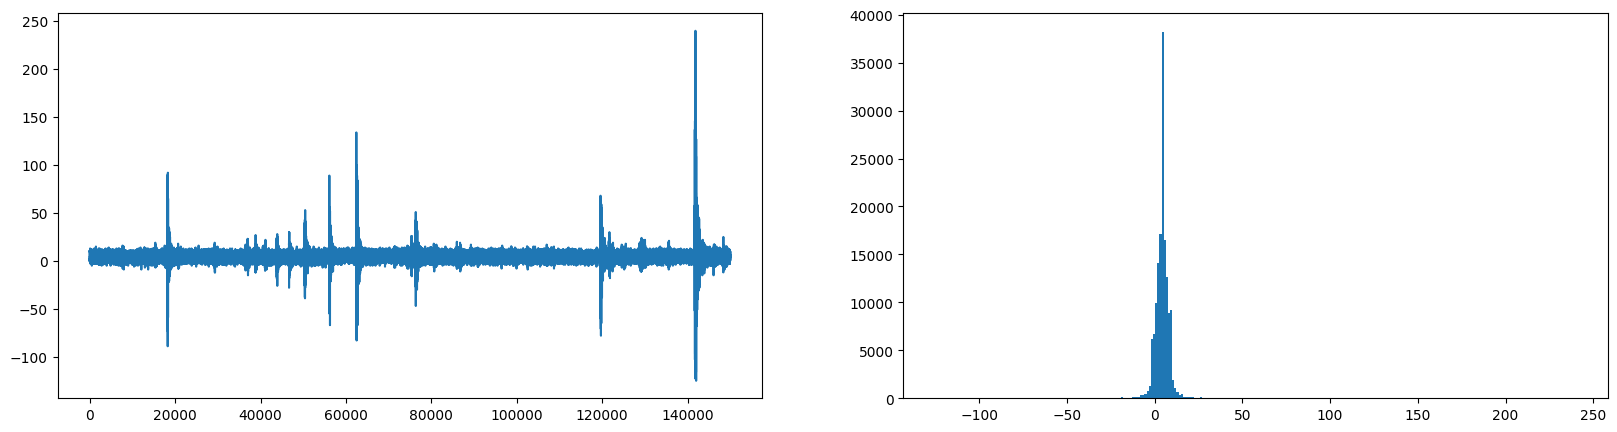

In [16]:

def get_Acoustic2():
	'''
	Source:
		https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/overview
	'''
	return pd.read_csv(r'seg_1bd38e.csv')["acoustic_data"].values

ac2 = get_Acoustic2()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ac2)
plt.subplot(1,2,2)
plt.hist(ac2,bins=300)
plt.show()

In [17]:
lanl2 = chi.chiSpace(ac2)

In [72]:
symh = chi.get_SYMH()["SYMH"].values

In [73]:
symh_chi = chi.chiSpace(symh)

In [75]:
symh_chi

{'GQQ': np.float64(0.2686863047524476),
 'Alpha': np.float64(0.4402386507926531)}

## Full time-series plot

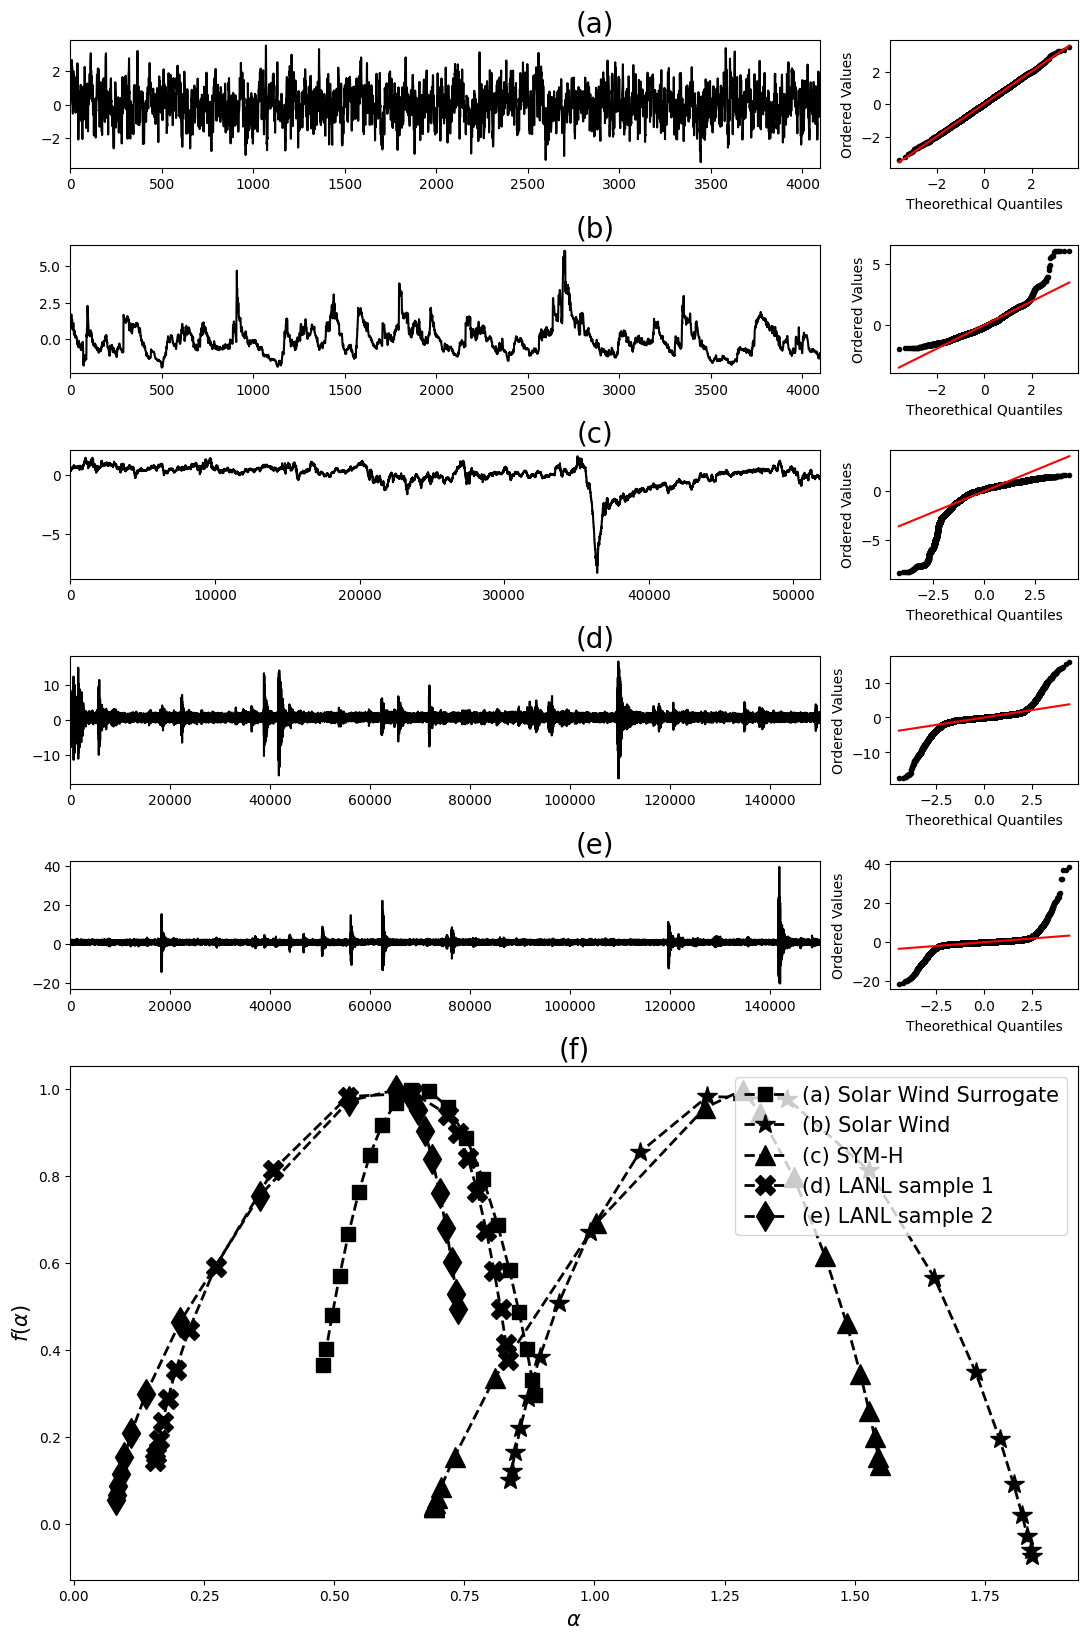

In [70]:
gs = GridSpec(6,2,height_ratios=[1,1,1,1,1,4],wspace=0.15,hspace=0.4,width_ratios=[4,1])

plt.figure(figsize=(13,20))

################################################################################
plt.subplot(gs[0,0])
plt.title("(a)",fontsize=20,x=0.7)
plt.plot(sw4096_s/np.std(sw4096_s),color='k')
plt.xlim(0,len(sw4096_s))
#plt.xlabel("Time")

ax = plt.subplot(gs[0,1])
ds = sw4096_s/np.std(sw4096_s)
(osm, osr), (slope, intercept, r) =  stats.probplot(ds,plot=None)
ax.plot(osm, osr, 'ok', markersize=3)
ax.plot([np.min(osm),np.max(osm)], np.polyval((slope,intercept),x=[np.min(osm),np.max(osm)]),color='r' )
plt.xlabel("Theorethical Quantiles")
plt.ylabel("Ordered Values")
plt.title("")


################################################################################
plt.subplot(gs[1,0])
plt.title("(b)",fontsize=20,x=0.7)
plt.plot(sw4096/np.std(sw4096),color='k')
plt.xlim(0,len(sw4096))
#plt.xlabel("Time")

ax = plt.subplot(gs[1,1])
ds = sw4096/np.std(sw4096)
(osm, osr), (slope, intercept, r) =  stats.probplot(ds,plot=None)
ax.plot(osm, osr, 'ok', markersize=3)
ax.plot([np.min(osm),np.max(osm)], np.polyval((slope,intercept),x=[np.min(osm),np.max(osm)]),color='r' )
plt.xlabel("Theorethical Quantiles")
plt.ylabel("Ordered Values")
plt.title("")

################################################################################

symh = chi.get_SYMH()["SYMH"].values
plt.subplot(gs[2,0])
plt.title("(c)",fontsize=20,x=0.7)
plt.plot((symh-np.average(symh))/np.std(symh),color='k')
plt.xlim(0,len(symh))
#plt.xlabel("Time")

ax = plt.subplot(gs[2,1])
ds = (symh-np.average(symh))/np.std(symh)
(osm, osr), (slope, intercept, r) =  stats.probplot(ds,plot=None)
ax.plot(osm, osr, 'ok', markersize=3)
ax.plot([np.min(osm),np.max(osm)], np.polyval((slope,intercept),x=[np.min(osm),np.max(osm)]),color='r' )
plt.xlabel("Theorethical Quantiles")
plt.ylabel("Ordered Values")
plt.title("")


################################################################################

plt.subplot(gs[3,0])
plt.title("(d)",fontsize=20,x=0.7)
plt.plot(ac1/np.std(ac1),color='k')
plt.xlim(0,len(ac2))
#plt.xlabel("Time")

ax = plt.subplot(gs[3,1])
ds = (ac1-np.average(ac1))/np.std(ac1)
(osm, osr), (slope, intercept, r) =  stats.probplot(ds,plot=None)
ax.plot(osm, osr, 'ok', markersize=3)
ax.plot([np.min(osm),np.max(osm)], np.polyval((slope,intercept),x=[np.min(osm),np.max(osm)]),color='r' )
plt.xlabel("Theorethical Quantiles")
plt.ylabel("Ordered Values")
plt.title("")

################################################################################

plt.subplot(gs[4,0])
plt.title("(e)",fontsize=20,x=0.7)
plt.plot(ac2/np.std(ac2),color='k')
plt.xlim(0,len(ac2))
#plt.xlabel("Time")

ax = plt.subplot(gs[4,1])
ds = (ac2-np.average(ac2))/np.std(ac2)
(osm, osr), (slope, intercept, r) =  stats.probplot(ds,plot=None)
ax.plot(osm, osr, 'ok', markersize=3)
ax.plot([np.min(osm),np.max(osm)], np.polyval((slope,intercept),x=[np.min(osm),np.max(osm)]),color='r' )
plt.xlabel("Theorethical Quantiles")
plt.ylabel("Ordered Values")
plt.title("")

################################################################################

plt.subplot(gs[5,:])
plt.title("(f)",fontsize=20)

a, fa =chi.getAverageSing(sw4096_s/np.std(sw4096_s))
plt.plot(a,fa, lw=2, color='k',marker='s',markersize=10,ls='--',label="(a) Solar Wind Surrogate")
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)

xa, xfa =chi.getAverageSing(sw4096/np.std(sw4096))
plt.plot(xa,xfa, lw=2, color='k',marker='*',markersize=15,ls='--',label="(b) Solar Wind")

xa, xfa =chi.getAverageSing(symh/np.std(symh))
plt.plot(xa,xfa, lw=2, color='k',marker='^',markersize=15,ls='--',label="(c) SYM-H")

xa, xfa =chi.getAverageSing(ac1/np.std(ac1))
plt.plot(xa,xfa, lw=2, color='k',marker='X',markersize=15,ls='--',label="(d) LANL sample 1")

xa, xfa =chi.getAverageSing(ac2/np.std(ac2))
plt.plot(xa,xfa, lw=2, color='k',marker='d',markersize=15,ls='--',label="(e) LANL sample 2")


leg = plt.legend(fontsize = 15)
#for l in leg.legendHandles:
#  l._sizes = [10]
plt.tight_layout()
plt.savefig("timeseries.png",dpi=200,bbox_inches='tight')
plt.show()

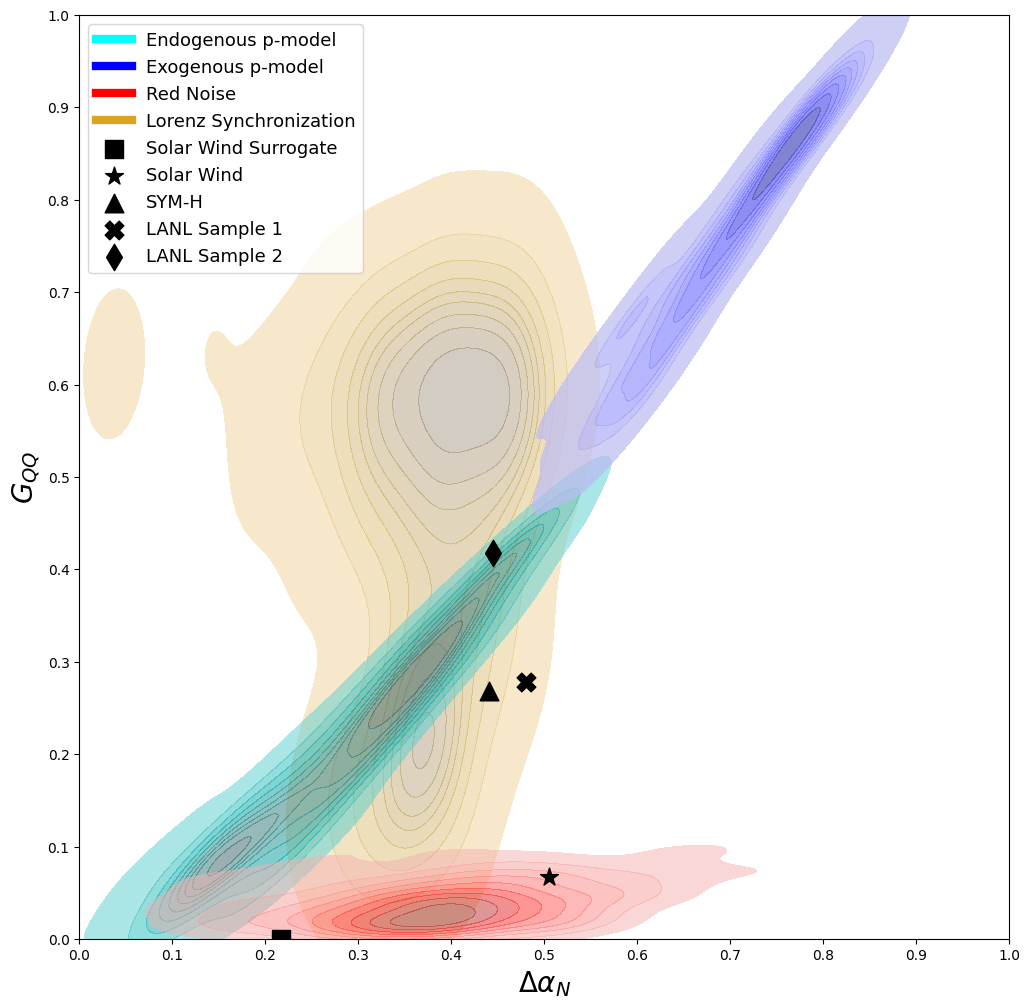

In [79]:
gs, [h,l] = chi.plot2()

h2 = plt.scatter(swc_s["Alpha"],swc_s["GQQ"],s=180,color='k',marker='s')
h.append(h2)
l.append("Solar Wind Surrogate")

h1 = plt.scatter(swc["Alpha"],swc["GQQ"],s=180,color='k',marker='*')
h.append(h1)
l.append("Solar Wind")

h1 = plt.scatter(symh_chi["Alpha"],symh_chi["GQQ"],s=180,color='k',marker='^')
h.append(h1)
l.append("SYM-H")


h3 = plt.scatter(lanl1["Alpha"],lanl1["GQQ"],s=180,color='k',marker="X")
h.append(h3)
l.append("LANL Sample 1")

h3 = plt.scatter(lanl2["Alpha"],lanl2["GQQ"],s=180,color='k',marker='d')
h.append(h3)
l.append("LANL Sample 2")

plt.legend(h,l,loc=2,fontsize=13)
plt.savefig("chiSpaceDatasets.png",dpi=300,bbox_inches='tight')
plt.show()